# SSCI 599 Project4
# Analyze the relationship between adult obesity rate, food desert, and community Vulnerability in Los Angeles city by census tract

## Yue Hao

## Import libraries

In [1]:
"""Import libraries"""

#pip install matplotlib,seaborn,sklearn,tensorflow, eli5

import pandas as pd
import numpy as np
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# MLP and feature importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# For splitting of dataset
from sklearn.model_selection import train_test_split


## 1. Read and explore data

### 1.1 Read raw data

In [2]:
"""Read csv file to get labels"""

# Please specify your local directory
#labels=pd.read_csv("your_own_path_to_the_file")
raw_data=pd.read_csv("obesity_food_vul.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OID_               1149 non-null   int64  
 1   Join_Count         1149 non-null   int64  
 2   LILATracts         1149 non-null   int64  
 3   LILATrac_1         1149 non-null   int64  
 4   LILATrac_2         1149 non-null   int64  
 5   LILATrac_3         1149 non-null   int64  
 6   MedianFami         1149 non-null   float64
 7   TractHUNV          1149 non-null   int64  
 8   TractSNAP          1149 non-null   int64  
 9   FIPS               1149 non-null   int64  
 10  RPL_THEME1         1149 non-null   float64
 11  RPL_THEME2         1149 non-null   float64
 12  RPL_THEME3         1149 non-null   float64
 13  RPL_THEME4         1149 non-null   float64
 14  RPL_THEMES         1149 non-null   float64
 15  OBESITY_CrudePrev  1149 non-null   float64
 16  Shape_Length       1149 

In [114]:
data=raw_data.copy()

### 1.2 Feature engineering

In [115]:
"""Scale the features to range [0,1]"""

# Drop the categorical feature: weather
scaler = MinMaxScaler()
features=["MedianFami","TractHUNV","TractSNAP","OBESITY_CrudePrev"]
for feature in features:
    data[feature] = scaler.fit_transform(data[feature].values.reshape(-1,1))

"""Categorical features"""

data=pd.get_dummies(data, columns=['LILATracts','LILATrac_1','LILATrac_2','LILATrac_3'])
columns=["OID_","Join_Count","FIPS","Shape_Length","Shape_Area"]
data=data.drop(columns,axis=1)
#data.head()

## 2. Data exploration

### An estimation based on correlation heat map

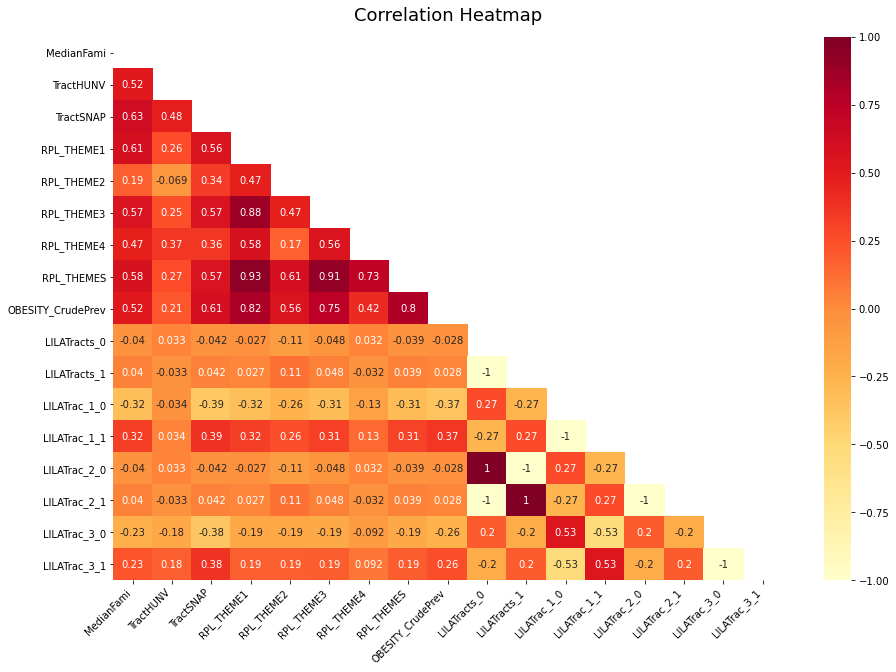

In [215]:
"""Triangle Correlation Heatmap"""

# hint: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
plt.figure(figsize=(15, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr()
                      , mask=mask
                      , vmin=-1
                      , vmax=1
                      , annot=True
                      , cmap="YlOrRd")
plt.xticks(rotation=45,horizontalalignment="right")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## 3. Build and train the NN model

In [165]:
"""Selected features"""

factors=['MedianFami','TractSNAP','RPL_THEME1','RPL_THEME2',
         'RPL_THEME3','RPL_THEME4','RPL_THEMES','LILATrac_1_1',]

X=data[factors]
# hints: https://www.kaggle.com/pratjain/permutation-importance
X_train, X_test, y_train, y_test = train_test_split(
    X, data["OBESITY_CrudePrev"], test_size=0.2, random_state=42)


In [193]:
"""Train MLP"""

clf = MLPRegressor(hidden_layer_sizes=5000, activation='relu',  
                  solver='adam', alpha=0.0001, batch_size='auto', 
                  learning_rate='constant', learning_rate_init=0.001, 
                  power_t=0.5, max_iter=10000, shuffle=True, random_state=None,
                  tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                  nesterovs_momentum=True, early_stopping=False, 
                  validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                  epsilon=1e-08, n_iter_no_change=100, max_fun=15000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Train R2 ",clf.score(X_train,y_train)*100)
print("Test R2 ",clf.score(X_test, y_test)*100)

Train R2  80.8122882692447
Test R2  79.3090333508008


In [194]:
"""Features importance"""

# hints: https://www.kaggle.com/pratjain/permutation-importance

perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.6019 ± 0.1473,RPL_THEME1
0.1767 ± 0.0568,RPL_THEMES
0.1117 ± 0.0159,RPL_THEME3
0.0888 ± 0.0298,TractSNAP
0.0506 ± 0.0082,RPL_THEME2
0.0297 ± 0.0128,RPL_THEME4
0.0245 ± 0.0110,MedianFami
0.0123 ± 0.0094,LILATrac_1_1


### When only one feature: socioeconomic vulnerability was used 

In [199]:
"""Train MLP with only socioeconomic vulnerability """

X_train, X_test, y_train, y_test = train_test_split(
    data[["RPL_THEME1"]], data["OBESITY_CrudePrev"], test_size=0.2, random_state=42)


In [200]:
"""Train MLP"""

clf = MLPRegressor(hidden_layer_sizes=5000, activation='relu',  
                  solver='adam', alpha=0.0001, batch_size='auto', 
                  learning_rate='constant', learning_rate_init=0.001, 
                  power_t=0.5, max_iter=10000, shuffle=True, random_state=None,
                  tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                  nesterovs_momentum=True, early_stopping=False, 
                  validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                  epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Train R2 ",clf.score(X_train,y_train)*100)
print("Test R2 ",clf.score(X_test, y_test)*100)

Train R2  69.20719360444407
Test R2  69.31350101002687
